# 1. Daten beschaffen ‚ñ∂
## Geeignete Daten beschaffen aus fertigen Datenbanken oder eigenen Daten
In diesem Notebook wird eine einfache Bilderkennung trainiert. Daf√ºr gibt es bereits fertige gelabelte Datens√§tze im Internet.
Hier habe ich mich f√ºr den CIFAR10-Datensatz entschieden (https://www.cs.toronto.edu/~kriz/cifar.html). Dieser Datensatz besteht aus 50,000 32x32 farbigen Trainingsbildern und 10,000 Testbildern, die f√ºr 10 Kategorien gelabeled wurden.

*   0 - Flugzeug
*   1 - Auto
*   2 - Vogel
*   3 - Katze
*   4 - Reh
*   5 - Hund
*   6 - Frosch
*   7 - Pferd
*   8 - Schiff
*   9 - Truck (LKW)

Man kann diesen Datensatz einfach √ºber Keras importieren (https://keras.io/api/datasets/cifar10/).

In [ ]:
!pip3 install tensorflow

In [ ]:
!pip3 install matplotlib

In [1]:
# Python Bibliotheken importieren
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Keras Datensatz importieren
from keras.datasets import cifar10
# keras utils, models und layers f√ºr das Modell importieren
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Datensatz laden
print("1. Lade CIFAR10-Datensatz")
(trainX, trainY), (testX, testY) = cifar10.load_data()
# Test- und Trainigsdaten
print('Train: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s' % (testX.shape, testY.shape))

1. Lade CIFAR10-Datensatz
170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 0us/step
Train: X=(50000, 32, 32, 3), Y=(50000, 1)
Test: X=(10000, 32, 32, 3), Y=(10000, 1)


# 2. Datenvorbereitung ‚ñ∂
## Bild-Daten formatieren, normalisieren, kategorisieren
Daten vorbereiten bedeutet f√ºr diese Anwendung, dass die Bild-Daten in eine einheitliche Form formatiert werden, normalisiert und codiert werden m√ºssen. Dabei wird folgende Funktion verwendet: to_categorical()

### to_categorical()
Diese Funktion formatiert eine Vektor-Klasse (mit integern) in eine bin√§re Matrix. Dies ist wichtig, damit die Daten zum Training verwendet werden k√∂nnen und ausgewertet werden k√∂nnen.

https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical


In [2]:
print("2. Daten vorbereiten:")
# Daten werden in den Bereich [0, 1] normalisiert
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# die Zielvariable wird in One-Hot-Format konvertiert (10 Klassen, 0-9)
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)
print('Train: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s' % (testX.shape, testY.shape))

2. Daten vorbereiten:
Train: X=(50000, 32, 32, 3), Y=(50000, 10)
Test: X=(10000, 32, 32, 3), Y=(10000, 10)


# 3. Trainings- und Testdaten
## Daten in Trainings - und Testdatensets teilen
Dieser Schritt eintf√§llt da der Datensatz bereits so aufgeteilt ist.

# 4.1 Modelltraining
## Defintion eines geeigneten Modells f√ºr Bilderkennung
Begonnen wird hier ein einfaches Modell f√ºr den Anfang implementiert. Folgende Schichten werden dabei verwendet:
### Sequential
Das Sequential-Modell ist geeignet, wenn das Modell mehrere, verschiedene Schichten hat, bei dem jede Schicht genau eine Input-Variable und eine Output-Variable hat.

https://keras.io/guides/sequential_model/
### Conv2D
Diese Schicht erstellt ein Convolution Kernel:
Ein Convolution Kernel (oder auch Filter) ist eine kleine Matrix, z. B. 3x3 oder 5x5, die √ºber das Eingabebild "gleitet" (sliding window).
Jeder Kernel hat lernbare Parameter (Gewichte), die w√§hrend des Trainings angepasst werden.
Der Convolution Kernel wird mit dem Input der Schicht (hier ein Bild) gefaltet (konvolviert).
Bei der Faltung wird der Kernel schrittweise √ºber das Eingabebild bewegt. An jeder Position wird ein Punktprodukt zwischen den Werten im Kernel und den entsprechenden Pixelwerten im Bild berechnet.
Das Ergebnis des Punktprodukts wird in eine neue Matrix geschrieben ‚Äì das ist die Feature Map oder der Output Tensor.

https://keras.io/api/layers/convolution_layers/convolution2d/
### MaxPooling2D
Die MaxPooling2D Schicht reduziert die Dimension der mehrdimensionalen Eingabe der Schicht.
Im Fall der Bilderkennung reduziert es jedes Mal die Dimension des Eingabebilds.

https://keras.io/api/layers/pooling_layers/max_pooling2d/
### Flatten
Diese Schicht wandelt mehrdimensionale Eingaben (z. B. die Ausgaben von Convolutional- oder Pooling-Layern) in einen eindimensionalen Vektor um. Dieser Vektor kann dann als Eingabe f√ºr vollst√§ndig verbundene Schichten (Dense-Schichten) verwendet werden.

https://keras.io/search.html?query=flatten
### Dense
Die Dense-Schicht (auch vollst√§ndig verbundene Schicht oder Fully Connected Layer genannt) ist eine grundlegende Schicht in neuronalen Netzwerken. Es verbindet jedes Neuron in der Eingabe vollst√§ndig mit jedem Neuron in der Ausgabe und ist f√ºr das Lernen und die Gewichtung von Merkmalen verantwortlich.

https://keras.io/api/layers/core_layers/dense/

In [3]:
print("4.1 Definition des Modells")
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

4.1 Definition des Modells


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 30, 30, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 15, 15, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)                    ‚îÇ (None, 7200)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 10)                  ‚îÇ          72,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 72,906 (284.79 KB)

 Trainable params: 72,906 (284.79 KB)

 Non-trainable params: 0 (0.00 B)

## 4.1.1 Training und Analyse des Modells

4.1.1 Trainiere das Modell

Epoch 1/10
1563/1563 - 8s - 5ms/step - accuracy: 0.4664 - loss: 1.5232 - val_accuracy: 0.5343 - val_loss: 1.3302
Epoch 2/10
1563/1563 - 3s - 2ms/step - accuracy: 0.5741 - loss: 1.2308 - val_accuracy: 0.5924 - val_loss: 1.1959
Epoch 3/10
1563/1563 - 3s - 2ms/step - accuracy: 0.6107 - loss: 1.1327 - val_accuracy: 0.5776 - val_loss: 1.2148
Epoch 4/10
1563/1563 - 5s - 3ms/step - accuracy: 0.6320 - loss: 1.0694 - val_accuracy: 0.6058 - val_loss: 1.1669
Epoch 5/10
1563/1563 - 3s - 2ms/step - accuracy: 0.6513 - loss: 1.0232 - val_accuracy: 0.5984 - val_loss: 1.1790
Epoch 6/10
1563/1563 - 6s - 4ms/step - accuracy: 0.6646 - loss: 0.9863 - val_accuracy: 0.6126 - val_loss: 1.1223
Epoch 7/10
1563/1563 - 3s - 2ms/step - accuracy: 0.6735 - loss: 0.9552 - val_accuracy: 0.6119 - val_loss: 1.1509
Epoch 8/10
1563/1563 - 5s - 3ms/step - accuracy: 0.6821 - loss: 0.9319 - val_accuracy: 0.6396 - val_loss: 1.0712
Epoch 9/10
1563/1563 - 4s - 2ms/step - accuracy: 0.6922 - loss: 0.90

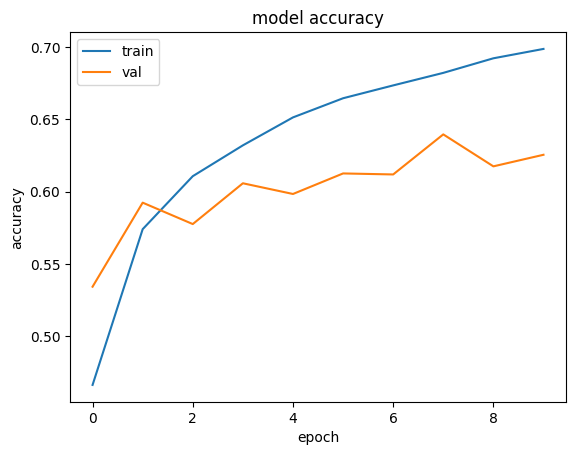

In [4]:
# Trainiere das Modell
print("4.1.1 Trainiere das Modell\n")
history= model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2, validation_data=(testX, testY))
# Speichere das Modell
model.save('digits_model.keras')
# Stelle die Accuracy als Plot dar
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Was ist Accuracy?
In der oberen Abbildung, die nach dem Training erscheint, erkennt man die Darstellung der Accuracy auf dem Trainings- und Testdatensatz (train und val).
Die Accuracy sagt aus, wie oft das Modell die Bilder richtig klassifiziert.
In der oberen Abbildung erkennt man dies also f√ºr das Training, sowie f√ºr die Testdaten um zu evaluieren, wie gut das Modell ist.

https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall
### Overfitting und Underfitting
Overfitting (√úberanpassung) bedeutet, dass das Modell die Trainingsdaten "zu gut" erlent hat und daher nicht in der Lage ist, dies auf unbekannte Testdaten richtig anzuwenden. Der Grund daf√ºr ist, dass das Machine Learning Modell Rauschen ber√ºcksichtigt hat. Overfitting f√ºhrt dann zu einer hohen Varianz.

Underfitting (Unteranpassung) hingegen bedeutet, dass das Modell die Zusammenh√§nge zwischen dem Input und Output nicht richtig erfasst und generalisiert zu stark. Underfitting f√ºhrt zu einer geringen Varianz und hohen Verzerrung.

Im Idealfall sollten die Accuracy der Trainings- und Testdaten etwa im gleichen Bereich liegen und sich nicht stark unterscheiden.

https://www.claimflow.de/post/overfitting-und-underfitting

### Analyse und Verbesserungsmethoden
Wie man erkennen kann, liegt die Accuracy bei etwa 68% am Ende der 10 Epochen (mit GPU T4 in Google Colab). Die Validation Accurarcy des Testdatensatzes liegt darunter, bei etwa 64,5%.
Die Diskrepanz zwischen Training und Validation Accuracy (~5.5%) ist akzeptabel und deutet auf ein gewisses Ma√ü an Overfitting hin, aber nicht in einem kritischen Bereich.
F√ºr einen ersten Entwurf ist dies ein guter Ausgangspunkt bietet jedoch Optimierungspotenzial. Daf√ºr k√∂nnen folgende Methoden herangezogen werden:


### Dropout
Durch diese Schicht werden in einer bestimmten Frequenz zuf√§llig Neuronen deaktiviert, um Overfitting zu verhindern. Dadurch k√∂nnen nicht zu viele Daten bzw. weniger Rauschen ber√ºcksichtigt werden.

https://keras.io/api/layers/regularization_layers/dropout/
### Data Augmentation bei der Datenvorbereitung
Data Augmentation bedeutet, dass die Daten des Datensatzes ver√§ndert werden, z.B. bei Bildern: drehen, spiegeln, Farbe ver√§ndern, ... Damit wird der Datensatz vervielf√§ltigt. So kann das Modell besser generalisieren.

https://www.datacamp.com/tutorial/complete-guide-data-augmentation?dc_referrer=https%3A%2F%2Fwww.google.com%2F
### Zahl der Neuronen erh√∂hen
Die Zahl der Neuronen kann in den Schichten erh√∂ht werden, daf√ºr kann der parameter in den Klammern erh√∂ht werden.
Beispiel:
`
statt Dense(10, activation='softmax')
zus√§tzlich Dense(100, activation='relu')
`
### Zahl der Epochen erh√∂hen
Auch die Zahl der Epochen beim Training kann erh√∂ht werden. Dadurch hat das Modell mehr durchg√§nge indem es die Merkmale lernen kann.
### Tuning von Hyperparametern
Es k√∂nnen auch verschiedene Parameter eingef√ºgt bzw. verbessert werden. Ein solcher Parameter ist die Lernrate. Es ist wichtig f√ºr das entdprechende Modell die passende Lernrate einzustellen. Meist ist sie m√∂glichst klein.

https://saturncloud.io/blog/how-to-improve-accuracy-in-neural-networks-with-keras/

Zus√§tzlich gibt es noch weitere Methoden.




# 4.2 Neues verbessertes Modell definieren ‚ñ∂

In [ ]:
print("4.2 Neues verbessertes Modell mit Data Augmentation:")

# Erstelle ein ImageDataGenerator-Objekt mit Augmentierungsparametern
datagen = ImageDataGenerator(
    rotation_range=5,         # Zuf√§llige Rotation bis zu 5 Grad
    zoom_range=0.1,           # Zuf√§lliges Zoomen
    fill_mode='nearest'       # Methode zum Auff√ºllen nach Augmentation
)

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5), # Dropout um Overfitting zu verhindern
    Conv2D(64, (3, 3), activation='relu'), # eine weitere Conv2D Schicht
    Flatten(),
    Dense(64, activation = 'relu'), # weitere Dense Schicht
    Dense(10, activation='softmax')
])
# hier wurde bei optimizer Adam die Lernrate mit 0.001 hinzugef√ºgt
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

4.2 Neues verbessertes Modell mit Data Augmentation:


Model: "sequential_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_3 (Conv2D)                    ‚îÇ (None, 30, 30, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)       ‚îÇ (None, 15, 15, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)                  ‚îÇ (None, 15, 15, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)                    ‚îÇ (None, 13, 13, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_5 (Flatten)                  ‚îÇ (None, 10816)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_9 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ         692,288 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                     ‚îÇ (None, 10)                  ‚îÇ             650 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 712,330 (2.72 MB)

 Trainable params: 712,330 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2.1 Verbessertes Modell trainieren

4.2.1 Trainiere das Modell

Epoch 1/10
1563/1563 - 29s - 19ms/step - accuracy: 0.6464 - loss: 1.0061 - val_accuracy: 0.6428 - val_loss: 1.0121
Epoch 2/10
1563/1563 - 43s - 27ms/step - accuracy: 0.6656 - loss: 0.9520 - val_accuracy: 0.6433 - val_loss: 1.0053
Epoch 3/10
1563/1563 - 32s - 20ms/step - accuracy: 0.6791 - loss: 0.9084 - val_accuracy: 0.6623 - val_loss: 0.9656
Epoch 4/10
1563/1563 - 31s - 20ms/step - accuracy: 0.6918 - loss: 0.8793 - val_accuracy: 0.6828 - val_loss: 0.9129
Epoch 5/10
1563/1563 - 40s - 26ms/step - accuracy: 0.6993 - loss: 0.8466 - val_accuracy: 0.6720 - val_loss: 0.9456
Epoch 6/10
1563/1563 - 29s - 18ms/step - accuracy: 0.7115 - loss: 0.8188 - val_accuracy: 0.6755 - val_loss: 0.9414
Epoch 7/10
1563/1563 - 28s - 18ms/step - accuracy: 0.7172 - loss: 0.8025 - val_accuracy: 0.6730 - val_loss: 0.9441
Epoch 8/10
1563/1563 - 41s - 26ms/step - accuracy: 0.7279 - loss: 0.7736 - val_accuracy: 0.6766 - val_loss: 0.9396
Epoch 9/10
1563/1563 - 42s - 27ms/step - accuracy: 0

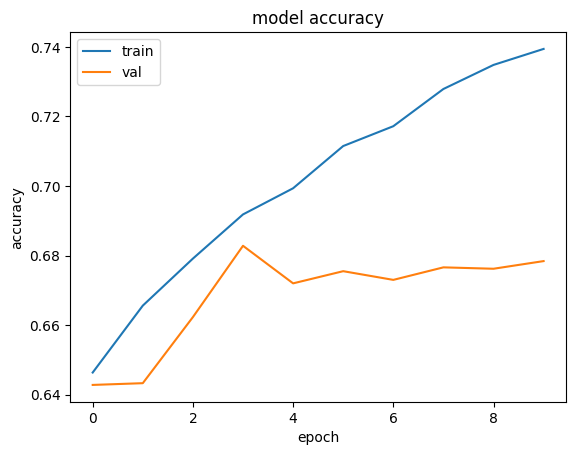

In [ ]:
# Trainiere das Modell
print("4.2.1 Trainiere das Modell\n")
history= model.fit(datagen.flow(trainX, trainY, batch_size=32), verbose=2, epochs=10, validation_data=(testX, testY))
# Speichere das Modell
model.save('digits_model.keras')
# Stelle die Accuracy als Plot dar
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Wie man sieht ist das Modell schon etwas verbessert, die Accuracy liegt nun bei etwa 71 % und die validation Accuracy liegt in den letzten Epochen leicht darunter.
Nat√ºrlich kann man das auch noch weiter optimieren & zus√§tlich auch √ºber noch mehr Epochen trainieren lassen.

# 4.3 Vortrainierte Modelle ‚ñ∂
Es gibt f√ºr die Bilderkennung auch vortrainierte, fertige Modelle, die man einf√ºgen kann, z.B.: ResNet, VGG, GoogLeNet, DenseNet, MobileNet, u.v.m.
Hier ist als Beispiel das MobileNetV2:
Das von Google entwickelte Modell ist gut f√ºr embedded Systeme oder mobile Systeme, die nicht so viel Rechenkapazit√§t besitzen.


https://www.geeksforgeeks.org/top-pre-trained-models-for-image-classification/

In [ ]:
from tensorflow.keras.applications import MobileNetV2

print("4.3 Vortrainiertes Modell ohne Data Augmentation")

# MobileNetV2 als Basis
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

# Modell erweitern
model2 = Sequential([
    base_model,
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


4.3 Vortrainiertes Modell ohne Data Augmentation


<ipython-input-26-e255c4b615b2>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "sequential_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ mobilenetv2_1.00_224 (Functional)    ‚îÇ (None, 1, 1, 1280)          ‚îÇ       2,257,984 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)                  ‚îÇ (None, 1, 1, 1280)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_6 (Flatten)                  ‚îÇ (None, 1280)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                     ‚îÇ (None, 64)                  ‚îÇ          81,984 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)                     ‚îÇ (None, 10)                  ‚îÇ             650 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 2,306,506 (8.80 MB)

 Non-trainable params: 34,112 (133.25 KB)

4.3.1 Trainiere das Modell

Epoch 1/10
1563/1563 - 70s - 45ms/step - accuracy: 0.5156 - loss: 1.4186 - val_accuracy: 0.5716 - val_loss: 1.3837
Epoch 2/10
1563/1563 - 17s - 11ms/step - accuracy: 0.6665 - loss: 1.0130 - val_accuracy: 0.6384 - val_loss: 1.2020
Epoch 3/10
1563/1563 - 20s - 13ms/step - accuracy: 0.7122 - loss: 0.8871 - val_accuracy: 0.5592 - val_loss: 2.0805
Epoch 4/10
1563/1563 - 21s - 14ms/step - accuracy: 0.7327 - loss: 0.8284 - val_accuracy: 0.6839 - val_loss: 1.2494
Epoch 5/10
1563/1563 - 19s - 12ms/step - accuracy: 0.7541 - loss: 0.7523 - val_accuracy: 0.6340 - val_loss: 1.4120
Epoch 6/10
1563/1563 - 18s - 11ms/step - accuracy: 0.7737 - loss: 0.6927 - val_accuracy: 0.7253 - val_loss: 1.0841
Epoch 7/10
1563/1563 - 20s - 13ms/step - accuracy: 0.7952 - loss: 0.6389 - val_accuracy: 0.7551 - val_loss: 0.8240
Epoch 8/10
1563/1563 - 21s - 13ms/step - accuracy: 0.8074 - loss: 0.5929 - val_accuracy: 0.7126 - val_loss: 1.2006
Epoch 9/10
1563/1563 - 17s - 11ms/step - accuracy: 0

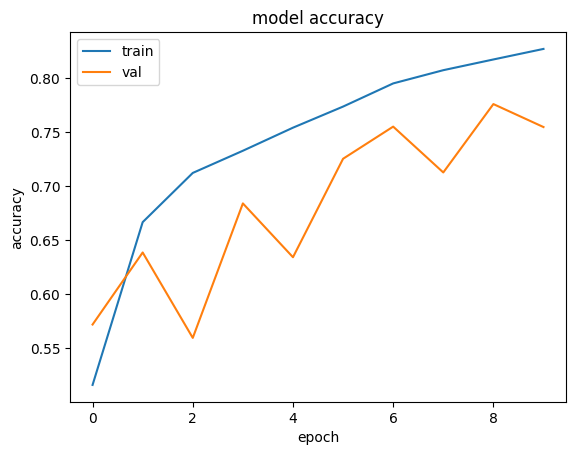

In [ ]:
# Trainiere das Modell
print("4.3.1 Trainiere das Modell\n")
history= model2.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2, validation_data=(testX, testY))
# Speichere das Modell
model2.save('digits_model.keras')
# Stelle die Accuracy als Plot dar
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Hier sieht man nun eine deutliche Verbesserung der Accuracy. Die validation Accuracy von ~74% zeigt auch, dass das Modell gut generalisiert, jedoch noch leichtes Overfitting und st√§rkere Schwankungen aufweist.

Es ist m√∂glich, dass das Modell zu komplex f√ºr den CIFAR10-Datensatz ist, da es auf gr√∂√üeren Datens√§tzen trainiert wurde. Daher ist eventuell auch ein weiter optimiertes sequential Modell, wie in Abschnitt 4.2, die bessere Wahl, da es deutlich weniger Schwankungen unterliegt.
Trotzdem ist eine Verbesserung erkennbar bei dem vortrainierten Modell.



# 5 Modelle testen üìñ
Die beiden Modelle k√∂nnen jetzt verwendet werden, um neue Bilder zu klassifizieren. So kann man die trainierten Modelle testen.
## Achtung
Um den folgenden Abschnitt selbst testen zu k√∂nnen, m√ºssen alle voherigen Abschnitte mit dem ‚ñ∂ Symbol ausgef√ºhrt werden.

## Eigenes Bild hochladen
Nachdem der n√§chste Schritt ausgef√ºhrt wurde, taucht ein Upload Button auf. Probieren Sie es selbst aus und klicken Sie auf den Button, um ein eigenes Bild, welches zu den Klassen passt, hochzuladen.




In [ ]:
from IPython.display import display
from ipywidgets import FileUpload
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Upload Widget
uploader = FileUpload(accept='image/*', multiple=False)
display(uploader)


FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
# Bild vorbereiten
def preprocess_image(image_file, target_size=(32, 32)):
    # Lade das Bild und skaliere es auf die Zielgr√∂√üe
    image = load_img(image_file, target_size=target_size)
    # Konvertiere es in ein NumPy-Array
    image_array = img_to_array(image)
    # Normalisiere die Pixelwerte (wie im Training)
    image_array = image_array / 255.0
    # F√ºge eine Batch-Dimension hinzu
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Bild klassifizieren
def classify_image(model, image_array, class_names):
    # Mache eine Vorhersage
    predictions = model.predict(image_array)
    # Finde die Klasse mit der h√∂chsten Wahrscheinlichkeit
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]
    return class_names[predicted_class], confidence

### Klassifiziere mit dem optimierten Sequential Modell (Abschnitt 4.2)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 258ms/step
Vorhersage: Frog
Sicherheit: 27.31%


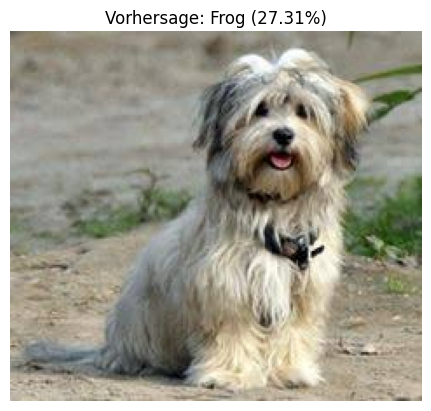

In [ ]:
# Liste der Klassen (CIFAR-10)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Hochladen und Klassifizieren
if uploader.value:
    # Lade das Bild aus dem Upload-Widget
    image_file = list(uploader.value.values())[0]['content']

    # Zeige das Bild an
    with open("uploaded_image.jpg", "wb") as f:
        f.write(image_file)
    image_array = preprocess_image("uploaded_image.jpg", target_size=(32, 32))

    # Klassifiziere das Bild mit dem eigenen Modell
    predicted_class, confidence = classify_image(model, image_array, class_names)

    # Ausgabe
    print(f"Vorhersage: {predicted_class}")
    print(f"Sicherheit: {confidence * 100:.2f}%")

    # Bild anzeigen
    plt.imshow(load_img("uploaded_image.jpg"))
    plt.axis('off')
    plt.title(f"Vorhersage: {predicted_class} ({confidence * 100:.2f}%)")
    plt.show()

### Klassifiziere mit dem Vortrainierten Modell (Abschnitt 4.3)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
Vorhersage: Bird
Sicherheit: 61.11%


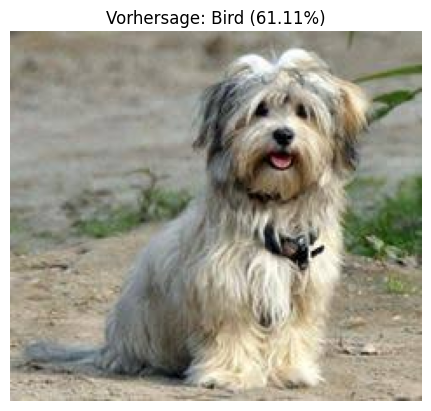

In [ ]:
# Liste der Klassen (CIFAR-10)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Hochladen und Klassifizieren
if uploader.value:
    # Lade das Bild aus dem Upload-Widget
    image_file = list(uploader.value.values())[0]['content']

    # Zeige das Bild an
    with open("uploaded_image.jpg", "wb") as f:
        f.write(image_file)
    image_array = preprocess_image("uploaded_image.jpg", target_size=(32, 32))

    # Klassifiziere das Bild mit dem eigenen Modell
    predicted_class, confidence = classify_image(model2, image_array, class_names)

    # Ausgabe
    print(f"Vorhersage: {predicted_class}")
    print(f"Sicherheit: {confidence * 100:.2f}%")

    # Bild anzeigen
    plt.imshow(load_img("uploaded_image.jpg"))
    plt.axis('off')
    plt.title(f"Vorhersage: {predicted_class} ({confidence * 100:.2f}%)")
    plt.show()

Wie man sieht klassifiziert das vortrainierte Modell die Bilder meistens etwas besser. Aber auch nicht immer richtig.
Um bessere Vorhersage zu treffen ben√∂tigt es mehr Epochen sowie weitere Optimierungen.

#### Quellen
Zus√§tzlich zu den bereits genannten Quellen in den oberen Textabschnitten wurde sich bei diesem Notebook an einem Beispiel aus dem Internet orientiert:
https://www.elab2go.de/demo-py1/keras-tensorflow.php?utm_source=chatgpt.com

Zus√§tzlich wurde ChatGPT als Hilfestellung bei der Optimierung von Code verwendet und als Unterst√ºtzung bei der Recherche.
